Clase 4
=======

Objetivos:
* Breve introducción al metabolismo celular
* Simplificaciones de su funcionamiento
* Modelos matemáticos
* Implementación computacional en Python usando programación lineal.


Breve introducción al metabolismo celular
-----------------------------------------

¿Por qué es importante estudiar el metabolismo celular?

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase4_quimiostato.jpeg" alt="Drawing" style="width: 400px;"/>

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase4_dinamica.jpeg" alt="Drawing" style="width: 400px;"/>


Si tenemos un modelo del metabolismo podemos anticipar lo que sucederá bajo nuevas condiciones, lo que nos ayudará a diseñar procesos más eficientes. 

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase4_cajaNegra.png" alt="Drawing" style="width: 400px;"/>




El problema es que incluso la red de un organismo simple, como el de la bacteria *Escherichia coli*, luce así:

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase4_eColiMetabolis.png" alt="Drawing" style="width: 800px;"/>

["Fuente KEGG"](https://www.genome.jp/kegg-bin/show_pathway?eco01100+M00125)

Resumen: ¡Es complicado!. **Busquemos un modelo a escala más pequeño para ganar intución.**


Metabolismo y la paradoja del origen de la vida
======================================

La [NASA ha definido la vida como](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3005285/): 

1. Un sistema químico autosustentable,
2. capaz de evolución Darwiniana.

La primera condición involucra el metabolismo, toda vez que el metabolismo es el conjunto de reacciones químicas que extraén energía del medio y producen todos los precursores (nucleotidos, lipidos, azucares, y aminoacidos) para generar biomasa.

Sin emabargo, la segunda condición implica que los objetos vivos tienen nucleotidos (o algún otro medio de almacenamiento de información) a su disposición, los cuales pueden reordenar. Pero los nucleotidos son moleculas complejas que dificilmente se crea de manera espontanea. Algún organimso debió ser el primero en crearlos.

Una explicación a la aparición de bases nucleotidas es que no fueron creados por un organimso, sino por un conjunto de reacciones simples que son las precursoras de la vida. Esta hipótesis se denomina [metabolismo primero](http://www.preposterousuniverse.com/blog/2010/03/10/free-energy-and-the-meaning-of-life/). Según esta hipotesis, un conjunto de reacciones quimicas espontaneas pueden autoreplicarse para aumentar progresivamente la complejidad de las moleculas involucradas, las cuales a su vez pueden crear sistemas más complejos. Sólo cuando hay un nivel de complejidad mínimo se puede apelar al mecanismo de evolución Darwiniana. 

Uno de los candidatos a metabolismo primogenio es la transformación de CO2 y H2 en CH4.

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase4_problemSolvedByLife.png" alt="Drawing" style="width: 800px;"/>

<img src="https://raw.githubusercontent.com/modcommet/Clases/master/methaneFreeEnergy.jpg" width="700">

Perfil de energía libre a través de la vía geoquímica (en purpura) a metano contrastado con la vías acetogénica bacteriana (triangulos) y metanogénica de las arqueas (cuadrados), ambas usando la via de la acetil conenzima-A.(Imagen adpatada de [Yung et al 2010](http://journalofcosmology.com/SearchForLife128.html) )


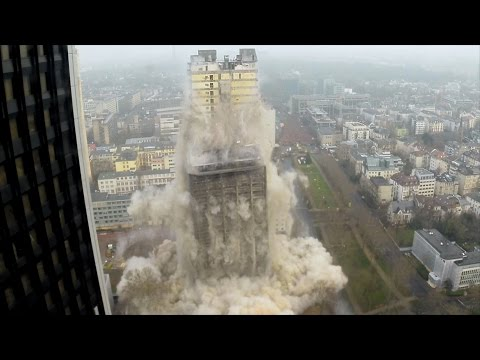

In [25]:
# Ejemplo de una reacción termodinamicamente favorable pero sin un mecanismo de liberación de energía
from IPython.lib.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=0, seconds=10).total_seconds())
stop=int(timedelta(hours=0, minutes=0, seconds=44).total_seconds())
YouTubeVideo("xYjF9WPyZfg", start=start, end=stop, theme="light", color="red")

Análisis en estado estacionario de una red simple
=========================================

Supongamos que este metabolismo primigenio está dado por la siguiente red (inventada) de reacciones:

<img src="https://raw.githubusercontent.com/modcommet/Clases/master/metanogenesis.png" width="700">


1. ¿Cuál es el balance de masa de sus metabolitos en estado estacionario?
2. ¿Cómo podemos representar el balance de masa en notación matricial?
3. ¿Cómo podemos calcular el valor de los flujos metabólicos?



Simulación de flujos metabólicos usando Programación lineal
===========

La distribución de flujos metabolicos de una celula puede ser modelado como:

\begin{align}
\mbox{max}\ & f(x)=c^Tx \\
\mbox{s.a.} & \\
&Sx=0 \\
&LB<=x<=UB
\end{align}

En donde `S` es la matriz estequiométrica, `x` los flujos metabólicos, y `LB` y `UB` que son los limites inferiores (lower bound) y superiores (upper bound) de cada flujo. Por otra parte, `c` contiene los coeficientes que ponderan el aporte de cada `x` a la generación de una función apropiada, las cuales tipicamente corresponden a biomasa o producción de energía. 

Para resolver este tipo de problemas usando el método simplex existe la librería `scipy.optimize.linprog`. Típicamente un modelo metabólico consiste en restricciones de igualdad, por ejemplo: 


\begin{align}
\mbox{min}\ &f(x)=70x_1+80X_2+85X_3 \\
\mbox{s.a:}\ & \\
&x_1+x_2+x_3+x_4=999 \\
&x_1+4x_2+8x_3+x_5 = 4500 \\
&40x_1 + 30x_2 +20x_3 = 36000 \\
&3x_1 + 2x_2 +4x_3 +x_6= 2700 \\
&x>=0
\end{align}

puede ser resuelto con la siguiente sintaxis:

``` python
import numpy as np
from scipy.optimize import linprog
from numpy.linalg import solve

A = np.array([
[1, 1, 1, 0, 0, 0],
[1, 4, 8, 1, 0, 0],
[40, 30, 20, 0, 1, 0],
[3, 2, 4, 0, 0, 1]])

b = np.array([999, 4500, 36000, 2700])
c = np.array([70, 80, 85, 0, 0, 0])

LB=[0]*6      # [0,0,0,0,0,0]
UB=[100000]*6 # ya sabes la idea

res = linprog(c, A_eq=A, b_eq=b, bounds=list(zip(LB,UB)))
print('Optimal value:', res.fun, '\nX:', res.x)
```
Sin embargo, `linprog` tambien nos permite resolver problemas en donde las restricciones son una mezcla de igualdades y desigualdades. Por ejemplo:

\begin{align}
\mbox{min}\ &f(x)=70x_1+80X_2+85X_3 \\
\mbox{s.a:}\ & \\
&x_1+x_2+x_3=999 \\
&x_1+4x_2+8x_3 \le 4500 \\
&40x_1 + 30x_2 +20x_3 \le 36000 \\
&3x_1 + 2x_2 +4x_3 \le 2700 \\
&x>=0
\end{align}

Puede ser resuelto con las siguiente sintaxis:

``` python
import numpy as np
from scipy.optimize import linprog
from numpy.linalg import solve

A_eq = np.array([[1,1,1]])
b_eq = np.array([999])

A_ub = np.array([
[1, 4, 8],
[40,30,20],
[3,2,4]])

b_ub = np.array([4500, 36000,2700])

c = np.array([70, 80, 85])

LB=[0]*3
UB=[100000]*3

res = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub,bounds=list(zip(LB,UB)) )
print('Optimal value:', res.fun, '\nX:', res.x)
```

Ejercicio
-------------

Calcular el valor de los flujos metabólicos usando numpy.

1. Asumiendo que el flujo limitante es E1=10 [mmol/gDW/h] y que el organismo maximiza la producción de CH4.
2. Igual que 1 pero maximizando la producción de F420.